In [27]:
import numpy as np
# Sigmoid activation function
def sigmoid(z):
    print("get sig")
    return 1 / (1 + np.exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(a):
    print("sig deriv")
    return a * (1 - a)

def cross_entropy_loss(y_pred, y_true):
    print("cross ent")
    m = y_true.shape[0]
    # Clip predictions to prevent log(0)
    y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)
    # Compute cross-entropy loss
    loss = -np.sum(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped)) / m
    return loss


In [4]:
from pathlib import Path

# Specify the base directory where folders will be created
# Change this to your desired path. For example, to use the current directory:
# base_dir = Path.cwd()
base_dir = Path('./FinalProjectDataResized/')  # Replace with your target directory

# Ensure the base directory exists
base_dir.mkdir(parents=True, exist_ok=True)

# Loop through the range 10 to 62 inclusive
for i in range(10, 63):
    # Format the number with leading zeros to make it three digits
    folder_name = f"Sample{i:03}"
    # Create the full path for the new folder
    folder_path = base_dir / folder_name
    try:
        # Create the folder. If it already exists, do nothing due to exist_ok=True
        folder_path.mkdir(exist_ok=True)
        print(f"Created folder: {folder_path}")
    except Exception as e:
        print(f"Failed to create folder {folder_path}: {e}")


Created folder: FinalProjectDataResized\Sample010
Created folder: FinalProjectDataResized\Sample011
Created folder: FinalProjectDataResized\Sample012
Created folder: FinalProjectDataResized\Sample013
Created folder: FinalProjectDataResized\Sample014
Created folder: FinalProjectDataResized\Sample015
Created folder: FinalProjectDataResized\Sample016
Created folder: FinalProjectDataResized\Sample017
Created folder: FinalProjectDataResized\Sample018
Created folder: FinalProjectDataResized\Sample019
Created folder: FinalProjectDataResized\Sample020
Created folder: FinalProjectDataResized\Sample021
Created folder: FinalProjectDataResized\Sample022
Created folder: FinalProjectDataResized\Sample023
Created folder: FinalProjectDataResized\Sample024
Created folder: FinalProjectDataResized\Sample025
Created folder: FinalProjectDataResized\Sample026
Created folder: FinalProjectDataResized\Sample027
Created folder: FinalProjectDataResized\Sample028
Created folder: FinalProjectDataResized\Sample029


In [10]:
from PIL import Image, __version__ as PILLOW_VERSION
import os
from pathlib import Path

def get_resample_filter():
    """
    Determines the appropriate resampling filter based on Pillow version.
    """
    major_version = int(PILLOW_VERSION.split('.')[0])
    if hasattr(Image, 'Resampling'):
        # Pillow >= 10.0
        print("Using Pillow Resampling module.")
        return Image.Resampling.LANCZOS
    else:
        # Pillow < 10.0
        print("Using legacy resampling filters.")
        return Image.LANCZOS  # ANTIALIAS is an alias for LANCZOS in older versions

def resize_image(source_image_path, target_image_path, new_size, resample_filter):
    """
    Resizes a single image and saves it to the target path.
    
    :param source_image_path: Path to the source image.
    :param target_image_path: Path where the resized image will be saved.
    :param new_size: Tuple specifying the new size (width, height).
    :param resample_filter: Resampling filter to use.
    """
    try:
        with Image.open(source_image_path) as img:
            print(f"Processing image: {source_image_path}")
            resized_img = img.resize(new_size, resample=resample_filter)
            resized_img.save(target_image_path)
            print(f"Saved resized image to: {target_image_path}")
    except Exception as e:
        print(f"Failed to process {source_image_path}: {e}")

def process_folders(source_base_dir, target_base_dir, start=13, end=62, new_size=(80, 60)):
    """
    Iterates through folders named Sample{number} and resizes images within them.
    
    :param source_base_dir: Base directory containing source folders.
    :param target_base_dir: Base directory where resized images will be saved.
    :param start: Starting number for folder names.
    :param end: Ending number for folder names.
    :param new_size: Desired size for the resized images.
    """
    # Define supported image extensions
    supported_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    
    # Get the appropriate resampling filter
    resample_filter = get_resample_filter()
    
    for i in range(3, 12 + 1):
        # Format the folder name with leading zeros (e.g., Sample013)
        folder_name = f"Sample{i:03}"
        
        # Define source and target directory paths
        source_dir = Path(source_base_dir) / folder_name
        target_dir = Path(target_base_dir) / folder_name
        
        print(f"\nProcessing Folder: {folder_name}")
        print(f"Source Directory: {source_dir}")
        print(f"Target Directory: {target_dir}")
        
        # Check if source directory exists
        if not source_dir.exists() or not source_dir.is_dir():
            print(f"Source directory does not exist or is not a directory: {source_dir}")
            continue  # Skip to the next folder
        
        # Create the target directory if it doesn't exist
        target_dir.mkdir(parents=True, exist_ok=True)
        print(f"Ensured target directory exists: {target_dir}")
        
        # Iterate over all files in the source directory
        for filename in os.listdir(source_dir):
            if filename.lower().endswith(supported_extensions):
                source_path = source_dir / filename
                target_path = target_dir / filename
                
                # Resize and save the image
                resize_image(source_path, target_path, new_size, resample_filter)
        
        print(f"All images in {folder_name} have been processed.")

    print("\nAll folders have been processed successfully.")
if __name__ == "__main__":
    # Example usage for multiple images

    source_directory = "./FinalProjectData/"    # Replace with your source directory
    target_directory = "./FinalProjectDataResized/"    # Replace with your target directory
    new_dimensions = (80, 60)                        # Desired size

    process_folders(source_directory, target_directory,13,62 ,new_dimensions)


Using Pillow Resampling module.

Processing Folder: Sample003
Source Directory: FinalProjectData\Sample003
Target Directory: FinalProjectDataResized\Sample003
Ensured target directory exists: FinalProjectDataResized\Sample003
Processing image: FinalProjectData\Sample003\img003-001.png
Saved resized image to: FinalProjectDataResized\Sample003\img003-001.png
Processing image: FinalProjectData\Sample003\img003-002.png
Saved resized image to: FinalProjectDataResized\Sample003\img003-002.png
Processing image: FinalProjectData\Sample003\img003-003.png
Saved resized image to: FinalProjectDataResized\Sample003\img003-003.png
Processing image: FinalProjectData\Sample003\img003-004.png
Saved resized image to: FinalProjectDataResized\Sample003\img003-004.png
Processing image: FinalProjectData\Sample003\img003-005.png
Saved resized image to: FinalProjectDataResized\Sample003\img003-005.png
Processing image: FinalProjectData\Sample003\img003-006.png
Saved resized image to: FinalProjectDataResized\S

In [184]:
def load_and_split_data(data_dir, image_size=(60, 80), train_per_class=50, test_per_class=5):
    """
    Loads, processes, and splits images into training and testing datasets.

    Parameters:
    - data_dir (str): Path to the main directory containing class folders.
    - image_size (tuple): Desired image size (width, height).
    - train_per_class (int): Number of training samples per class.
    - test_per_class (int): Number of testing samples per class.

    Returns:
    - X_train (np.ndarray): Training data of shape (num_train_samples, 4800).
    - Y_train (np.ndarray): One-hot encoded training labels of shape (num_train_samples, 62).
    - X_test (np.ndarray): Testing data of shape (num_test_samples, 4800).
    - Y_test (np.ndarray): One-hot encoded testing labels of shape (num_test_samples, 62).
    """
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []

    # Get a sorted list of class folder names to maintain consistent label ordering
    class_folders = sorted([folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))])
    print(f"Class folders: {class_folders}")

    # Ensure there are exactly 62 classes
    assert len(class_folders) == 62, f"Expected 62 classes, but found {len(class_folders)}."
    print(f"Number of classes: {len(class_folders)}")

    for label_index, folder in enumerate(class_folders):
        folder_path = os.path.join(data_dir, folder)
        print(f"Processing folder: {folder_path} with label index: {label_index}")

        # List all image files in the current class folder
        image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
        print(f"Image files: {image_files}")

        # Check if there are enough samples per class
        if len(image_files) < (train_per_class + test_per_class):
            raise ValueError(f"Not enough samples in {folder_path}. Required: {train_per_class + test_per_class}, Found: {len(image_files)}")
        print(f"Number of samples: {len(image_files)}")

        # Randomly shuffle the image files


        # Split into training and testing
        train_files = image_files[:train_per_class]
        test_files = image_files[train_per_class:train_per_class + test_per_class]
        print(f"Training files: {train_files}")
        print(f"Testing files: {test_files}")

        # Process training images
        for image_file in train_files:
            image_path = os.path.join(folder_path, image_file)
            print(f"Processing training image: {image_path}")

            try:
                # Open the image file
                with Image.open(image_path) as img:
                    # Convert image to grayscale ('L' mode)
                    img = img.convert('L')


                    # Convert image to NumPy array
                    img_array = np.array(img)

                    # Binarize the image: Convert to 0 and 1
                    threshold = 128
                    img_binary = (img_array > threshold).astype(np.float32)

                    # Flatten the 2D image to 1D vector of size 4800
                    img_flatten = img_binary.flatten()  # Shape: (4800,)

                    # Append to X_train
                    X_train.append(img_flatten)

                    # Create one-hot encoded label and append to Y_train
                    one_hot_label = np.zeros(62)
                    one_hot_label[label_index] = 1
                    Y_train.append(one_hot_label)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                continue  # Skip this image and continue with the next

        # Process testing images
        for image_file in test_files:
            image_path = os.path.join(folder_path, image_file)
            print(f"Processing testing image: {image_path}")

            try:
                # Open the image file
                with Image.open(image_path) as img:
                    # Convert image to grayscale ('L' mode)
                    img = img.convert('L')

                    # Resize the image if it's not already 80x60
                    if img.size != image_size:
                        img = img.resize(image_size)

                    # Convert image to NumPy array
                    img_array = np.array(img)

                    # Binarize the image: Convert to 0 and 1
                    threshold = 128
                    img_binary = (img_array > threshold).astype(np.float32)

                    # Flatten the 2D image to 1D vector of size 4800
                    img_flatten = img_binary.flatten()  # Shape: (4800,)

                    # Append to X_test
                    X_test.append(img_flatten)

                    # Create one-hot encoded label and append to Y_test
                    one_hot_label = np.zeros(62)
                    one_hot_label[label_index] = 1
                    Y_test.append(one_hot_label)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                continue  # Skip this image and continue with the next

    # Convert lists to NumPy arrays
    X_train = np.array(X_train)  # Shape: (62*50=3100, 4800)
    Y_train = np.array(Y_train)  # Shape: (3100, 62)
    X_test = np.array(X_test)    # Shape: (62*5=310, 4800)
    Y_test = np.array(Y_test)    # Shape: (310, 62)


    print(f"Total training samples: {X_train.shape[0]}")
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of Y_train: {Y_train.shape}")
    print(f"Total testing samples: {X_test.shape[0]}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of Y_test: {Y_test.shape}")

    return X_train, Y_train, X_test, Y_test

def preprocess_data(X):
    """
    Normalizes the input data to [0, 1].

    Parameters:
    - X (np.ndarray): Input data array.

    Returns:
    - X_normalized (np.ndarray): Normalized input data.
    """
    # Since X is already binary (0 and 1), normalization is technically redundant.
    # However, to ensure data type is float and consistent scaling:
    X_normalized = X / 1.0  # Ensures data type is float and values are 0 or 1
    return X_normalized

def one_hot_encode(labels, num_classes):
    """
    Converts integer labels to one-hot encoded vectors.

    Parameters:
    - labels (np.ndarray): Array of integer labels. Shape: (num_samples,)
    - num_classes (int): Total number of classes.

    Returns:
    - one_hot (np.ndarray): One-hot encoded labels. Shape: (num_samples, num_classes)
    """
    one_hot = np.zeros((labels.size, num_classes))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot

def main():
    # Path to the main data directory containing 62 class folders (Sample000 to Sample061)
    data_directory = './FinalProjectDataResized/'  # Replace with your actual data directory path

    # Load and split the data
    X_train, Y_train, X_test, Y_test = load_and_split_data(
        data_dir=data_directory,
        image_size=(80, 60),
        train_per_class=50,
        test_per_class=5
    )

    # Preprocess the data (normalization)
    X_train = preprocess_data(X_train)
    print("X train preproced")
    X_test = preprocess_data(X_test)
    print("X test preproced")
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = main()


Class folders: ['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062']
Number of classes: 62
Processing folder: ./FinalProjectDataResized/Sample001 with label index: 0
Image files: ['img001-001.png', 'img001-002.png', 'img001-003.png', 'img001-004.p

In [ ]:
import numpy as np

# Activation functions and derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Avoid numerical instability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])
    return np.sum(log_likelihood) / m

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Backward propagation
def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Create mini-batches
def create_mini_batches(X, Y, batch_size):
    m = X.shape[0]
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    Y_shuffled = Y[indices]
    mini_batches = [
        (X_shuffled[i:i + batch_size], Y_shuffled[i:i + batch_size])
        for i in range(0, m, batch_size)
    ]
    return mini_batches

# Training function
def train(X_train, Y_train, input_size, hidden_size, output_size, epochs, learning_rate, batch_size):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        mini_batches = create_mini_batches(X_train, Y_train, batch_size)
        for X_mini, Y_mini in mini_batches:
            # Forward propagation
            Z1, A1, Z2, A2 = forward_propagation(X_mini, W1, b1, W2, b2)
            # Backward propagation
            dW1, db1, dW2, db2 = backward_propagation(X_mini, Y_mini, Z1, A1, Z2, A2, W1, W2)
            # Update parameters
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        # Compute loss
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        loss = cross_entropy_loss(Y_train, A2)
        print(f"Epoch {epoch}, Loss: {loss}")
    return W1, b1, W2, b2

# Prediction function
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

# Example usage
input_size = 4800
hidden_size = 100
output_size = 62
epochs = 100
learning_rate = 0.001
batch_size = 64

# Assume X_train, Y_train, X_test, and Y_test are defined
W1, b1, W2, b2 = train(X_train, Y_train, input_size, hidden_size, output_size, epochs, learning_rate, batch_size)

# Test the


Epoch 0, Loss: 4.140278443933871
Epoch 10, Loss: 4.066471516371193


In [185]:
from sklearn.utils import shuffle

# Shuffle X and Y together
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_test, Y_test = shuffle(X_test, Y_test, random_state=42)


In [15]:
print(f"Shape of X_train: {X_train.shape}")

Shape of X_train: (3100, 4800)


In [43]:
import numpy as np

# Network architecture
input_size = 4800      # Number of input neurons (80x60 pixels flattened)
hidden_size = 100      # Number of hidden neurons
output_size = 62       # Number of output neurons (26 uppercase + 26 lowercase letters + 10 digits)

# Hyperparameters
learning_rate = 0.001  
epochs = 10
batch_size = 3100

# Initialize weights and biases
np.random.seed(42)  # For reproducibility

# Weights initialization with small random values
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Shape: (4800, 100)
W2 = np.random.randn(hidden_size, output_size) * 0.01 # Shape: (100, 62)

# Biases initialization to 1
b1 = np.ones((1, hidden_size))  # Shape: (1, 100)
b2 = np.ones((1, output_size))  # Shape: (1, 62)


In [ ]:
def forward_pass(X):
    global W1, b1, W2, b2
    # Hidden Layer
    Z1 = np.dot(X, W1) + b1        # Pre-activation. Shape: (batch_size, 100)
    A1 = sigmoid(Z1)               # Post-activation. Shape: (batch_size, 100)
    print(Z1.shape, "z1 shape")
    # Output Layer
    Z2 = np.dot(A1, W2) + b2       # Pre-activation. Shape: (batch_size, 62)
    A2 = sigmoid(Z2)               # Post-activation. Shape: (batch_size, 62)
    
    cache = (Z1, A1, Z2, A2)
    print("fw p")
    return A2, cache


In [29]:
def backward_pass(X, y_true, cache):
    m = y_true.shape[0]  # Number of samples in the batch
    Z1, A1, Z2, A2 = cache
    
    # Output Layer Error
    dZ2 = A2 - y_true                     # Shape: (batch_size, 62)
    dW2 = np.dot(A1.T, dZ2) / m           # Shape: (100, 62)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # Shape: (1, 62)
    
    # Hidden Layer Error
    dA1 = np.dot(dZ2, W2.T)               # Shape: (batch_size, 100)
    dZ1 = dA1 * sigmoid_derivative(A1)    # Shape: (batch_size, 100)
    dW1 = np.dot(X.T, dZ1) / m            # Shape: (4800, 100)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # Shape: (1, 100)
    
    gradients = (dW1, db1, dW2, db2)
    print("grad compd")
    return gradients


In [60]:
def update_parameters(gradients, learning_rate):
    global W1, b1, W2, b2
    dW1, db1, dW2, db2 = gradients
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return  W1, b1, W2, b2


In [64]:
def evaluate_accuracy(X, Y_true):
    global W1, b1, W2, b2
    A2, _ = forward_pass(X)
    predictions = np.argmax(A2, axis=1)
    true_labels = np.argmax(Y_true, axis=1)
    accuracy = np.mean(predictions == true_labels) * 100
    return accuracy, predictions, true_labels

In [62]:
def train(X_train, Y_train, X_test, Y_test, epochs, batch_size, learning_rate):
    global W1, b1, W2, b2
    for epoch in range(epochs):
        # Shuffle the training data
        permutation = np.random.permutation(X_train.shape[0])
        X_shuffled = X_train[permutation]
        Y_shuffled = Y_train[permutation]
        
        epoch_loss = 0
        for i in range(0, X_shuffled.shape[0], batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]
            
            # Forward Pass
            A2, cache = forward_pass(X_batch)
            
            # Compute Loss
            loss = cross_entropy_loss(A2, Y_batch)
            epoch_loss += loss
            
            # Backward Pass
            gradients = backward_pass(X_batch, Y_batch, cache)
            
            # Update Parameters
            W1, b1, W2, b2 = update_parameters(gradients, learning_rate)
        
        # Average loss over all batches
        avg_epoch_loss = epoch_loss / (X_shuffled.shape[0] / batch_size)
        
        # Evaluate on Test Set
        test_accuracy, _, _ = evaluate_accuracy(X_test, Y_test)
        
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_epoch_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


In [22]:
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((labels.size, num_classes))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot


In [23]:
def predict(X):
    A2, _ = forward_pass(X)
    predictions = np.argmax(A2, axis=1)
    return predictions


In [65]:
# Load your dataset
# X_data: (num_samples, 4800)
# y_labels: (num_samples,) with integer labels from 0 to 61

# Normalize input data

# One-hot encode labels
num_classes = 62

# Split data into training and test sets if needed

# Train the network
train(X_train, Y_train, X_test, Y_test, epochs, batch_size, learning_rate)

# Make predictions
predictions = predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == Y_test)
print(f'Training Accuracy: {accuracy * 100:.2f}%')


get sig
(3100, 100) z1 shape
get sig
fw p
cross ent
sig deriv
grad compd
get sig
(310, 100) z1 shape
get sig
fw p
Epoch 1/10, Loss: 75.7168, Test Accuracy: 1.61%
get sig
(3100, 100) z1 shape
get sig
fw p
cross ent
sig deriv
grad compd
get sig
(310, 100) z1 shape
get sig
fw p
Epoch 2/10, Loss: 74.0372, Test Accuracy: 1.61%
get sig
(3100, 100) z1 shape
get sig
fw p
cross ent
sig deriv
grad compd
get sig
(310, 100) z1 shape
get sig
fw p
Epoch 3/10, Loss: 72.3277, Test Accuracy: 1.61%
get sig
(3100, 100) z1 shape
get sig
fw p
cross ent
sig deriv
grad compd
get sig
(310, 100) z1 shape
get sig
fw p
Epoch 4/10, Loss: 70.5807, Test Accuracy: 1.61%
get sig
(3100, 100) z1 shape
get sig
fw p
cross ent
sig deriv
grad compd
get sig
(310, 100) z1 shape
get sig
fw p
Epoch 5/10, Loss: 68.7941, Test Accuracy: 1.61%
get sig
(3100, 100) z1 shape
get sig
fw p
cross ent
sig deriv
grad compd
get sig
(310, 100) z1 shape
get sig
fw p
Epoch 6/10, Loss: 66.9712, Test Accuracy: 1.61%
get sig
(3100, 100) z1 shape

ValueError: operands could not be broadcast together with shapes (310,) (310,62) 

In [33]:
true_labels = np.argmax(Y_test, axis=1)  # Shape: (num_samples,)

In [ ]:
true_labels

In [42]:
correct_predictions = predictions == true_labels
accuracy = np.mean(predictions == true_labels) 
accuracy

0.016129032258064516

In [66]:
Y_train.shape

(3100, 62)

In [131]:
import numpy as np

def verify_label_encoding(Y, dataset_name="Dataset"):
    """
    Verifies that each sample in Y has exactly one active class.

    Parameters:
    - Y (np.ndarray): One-hot encoded labels, shape (num_samples, num_classes)
    - dataset_name (str): Name of the dataset for identification

    Returns:
    - None
    """
    sum_per_sample = Y.sum(axis=1)
    if not np.all(sum_per_sample == 1):
        print(f"[ERROR] {dataset_name} labels are not properly one-hot encoded.")
        # Identify problematic samples
        problematic_indices = np.where(sum_per_sample != 1)[0]
        print(f"Problematic sample indices: {problematic_indices}")
    else:
        print(f"[SUCCESS] {dataset_name} labels are properly one-hot encoded.\n")

# Example usage:
# verify_label_encoding(Y_train, "Training Set")
# verify_label_encoding(Y_test, "Test Set")
import matplotlib.pyplot as plt

def check_data_alignment(X, Y, num_samples=5):
    """
    Checks the alignment between images and labels by visualizing them.

    Parameters:
    - X (np.ndarray): Input data, shape (num_samples, 4800)
    - Y (np.ndarray): One-hot encoded labels, shape (num_samples, 62)
    - num_samples (int): Number of samples to visualize

    Returns:
    - None
    """
    for i in range(80,80+7):
        img = X[i].reshape(60, 80)  # Adjust if your image dimensions differ
        true_label = np.argmax(Y[i])
        plt.imshow(img, cmap='gray')
        plt.title(f"Sample {i+1} - True Label: {true_label}")
        plt.axis('off')
        plt.show()

# Example usage:
# check_data_alignment(X_train, Y_train, num_samples=5)
def normalize_data(X):
    """
    Normalizes the input data to be between 0 and 1.

    Parameters:
    - X (np.ndarray): Input data

    Returns:
    - X_normalized (np.ndarray): Normalized input data
    """
    return X / 1.0  # Assuming X is already binary (0 and 1). If not, adjust accordingly.

# Example usage:
# X_train_normalized = normalize_data(X_train)
# X_test_normalized = normalize_data(X_test)


In [120]:
def inspect_output_probabilities(nn, X_sample, Y_sample, num_samples=5):
    """
    Inspects the output probabilities for a few samples.

    Parameters:
    - nn (NeuralNetwork): Instance of the NeuralNetwork class.
    - X_sample (np.ndarray): Input data, shape (num_samples, input_size)
    - Y_sample (np.ndarray): True labels, shape (num_samples, output_size)
    - num_samples (int): Number of samples to inspect

    Returns:
    - None
    """
    A2, _ = nn.forward_pass(X_sample)
    true_labels = np.argmax(Y_sample, axis=1)
    predictions = np.argmax(A2, axis=1)

    for i in range(num_samples):
        print(f"Sample {i+1}:")
        print(f"True Label: {true_labels[i]}")
        print(f"Predicted Label: {predictions[i]}")
        print(f"Output Probabilities: {A2[i]}\n")

# Example usage:
# inspect_output_probabilities(nn, X_test[:5], Y_test[:5], num_samples=5)
def numerical_gradient_check(nn, X, Y, epsilon=1e-7):
    """
    Performs numerical gradient checking to verify backpropagation.

    Parameters:
    - nn (NeuralNetwork): Instance of the NeuralNetwork class.
    - X (np.ndarray): Input data, shape (1, input_size)
    - Y (np.ndarray): True labels, shape (1, output_size)
    - epsilon (float): Small value to compute numerical gradients

    Returns:
    - difference (float): Difference between numerical and analytical gradients
    """
    # Perform a forward pass
    A2, cache = nn.forward_pass(X)
    # Compute analytical gradients
    gradients = nn.backward_pass(X, Y, cache)
    dW1_analytical, db1_analytical, dW2_analytical, db2_analytical = gradients

    # Initialize numerical gradients
    dW1_numerical = np.zeros_like(nn.W1)
    dW2_numerical = np.zeros_like(nn.W2)
    db1_numerical = np.zeros_like(nn.b1)
    db2_numerical = np.zeros_like(nn.b2)

    # Compute numerical gradients for W1
    for i in range(nn.W1.shape[0]):
        for j in range(nn.W1.shape[1]):
            original_value = nn.W1[i, j]
            nn.W1[i, j] = original_value + epsilon
            loss_plus = nn.compute_loss(*nn.forward_pass(X), Y)
            nn.W1[i, j] = original_value - epsilon
            loss_minus = nn.compute_loss(*nn.forward_pass(X), Y)
            dW1_numerical[i, j] = (loss_plus - loss_minus) / (2 * epsilon)
            nn.W1[i, j] = original_value  # Reset to original value

    # Compute numerical gradients for W2
    for i in range(nn.W2.shape[0]):
        for j in range(nn.W2.shape[1]):
            original_value = nn.W2[i, j]
            nn.W2[i, j] = original_value + epsilon
            loss_plus = nn.compute_loss(*nn.forward_pass(X), Y)
            nn.W2[i, j] = original_value - epsilon
            loss_minus = nn.compute_loss(*nn.forward_pass(X), Y)
            dW2_numerical[i, j] = (loss_plus - loss_minus) / (2 * epsilon)
            nn.W2[i, j] = original_value  # Reset to original value

    # Compute numerical gradients for b1
    for i in range(nn.b1.shape[1]):
        original_value = nn.b1[0, i]
        nn.b1[0, i] = original_value + epsilon
        loss_plus = nn.compute_loss(*nn.forward_pass(X), Y)
        nn.b1[0, i] = original_value - epsilon
        loss_minus = nn.compute_loss(*nn.forward_pass(X), Y)
        db1_numerical[0, i] = (loss_plus - loss_minus) / (2 * epsilon)
        nn.b1[0, i] = original_value  # Reset to original value

    # Compute numerical gradients for b2
    for i in range(nn.b2.shape[1]):
        original_value = nn.b2[0, i]
        nn.b2[0, i] = original_value + epsilon
        loss_plus = nn.compute_loss(*nn.forward_pass(X), Y)
        nn.b2[0, i] = original_value - epsilon
        loss_minus = nn.compute_loss(*nn.forward_pass(X), Y)
        db2_numerical[0, i] = (loss_plus - loss_minus) / (2 * epsilon)
        nn.b2[0, i] = original_value  # Reset to original value

    # Compute difference between analytical and numerical gradients
    difference_W1 = np.linalg.norm(dW1_analytical - dW1_numerical) / (np.linalg.norm(dW1_analytical) + np.linalg.norm(dW1_numerical))
    difference_W2 = np.linalg.norm(dW2_analytical - dW2_numerical) / (np.linalg.norm(dW2_analytical) + np.linalg.norm(dW2_numerical))
    difference_b1 = np.linalg.norm(db1_analytical - db1_numerical) / (np.linalg.norm(db1_analytical) + np.linalg.norm(db1_numerical))
    difference_b2 = np.linalg.norm(db2_analytical - db2_numerical) / (np.linalg.norm(db2_analytical) + np.linalg.norm(db2_numerical))

    print(f"Gradient Check Difference W1: {difference_W1}")
    print(f"Gradient Check Difference W2: {difference_W2}")
    print(f"Gradient Check Difference b1: {difference_b1}")
    print(f"Gradient Check Difference b2: {difference_b2}")

    # Total difference
    total_difference = difference_W1 + difference_W2 + difference_b1 + difference_b2
    print(f"Total Gradient Difference: {total_difference}")

    return total_difference

# Example usage:
# difference = numerical_gradient_check(nn, X_train[0:1], Y_train[0:1])
# if difference < 1e-7:
#     print("Backward pass is correct.")
# else:
#     print("Backward pass has errors.")


In [126]:
print("Unique values in X_train:", np.unique(X_train))
from collections import Counter

def analyze_class_distribution(Y, dataset_name="Dataset"):
    """
    Analyzes and prints the distribution of classes.

    Parameters:
    - Y (np.ndarray): One-hot encoded labels, shape (num_samples, num_classes)
    - dataset_name (str): Name of the dataset for identification

    Returns:
    - None
    """
    label_indices = np.argmax(Y, axis=1)
    class_counts = Counter(label_indices)
    print(f"{dataset_name} Class Distribution:")
    for cls in range(Y.shape[1]):
        print(f"Class {cls}: {class_counts.get(cls, 0)} samples")
    print("\n")

# Example usage:
# analyze_class_distribution(Y_train, "Training Set")
# analyze_class_distribution(Y_test, "Test Set")


Unique values in X_train: [0. 1.]


Unique values in X_train: [0. 1.]
X_train and X_test are already normalized between 0 and 1.

[SUCCESS] Training Set labels are properly one-hot encoded.

[SUCCESS] Test Set labels are properly one-hot encoded.

Visualizing a few samples to verify data alignment:


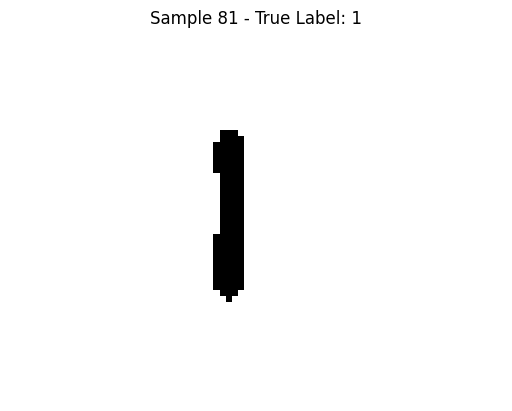

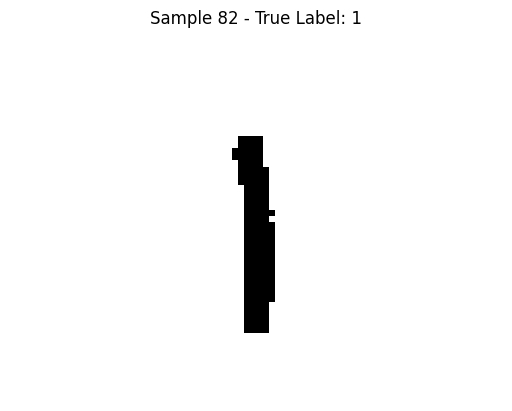

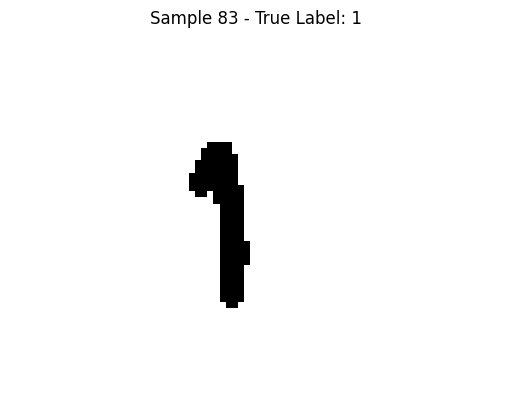

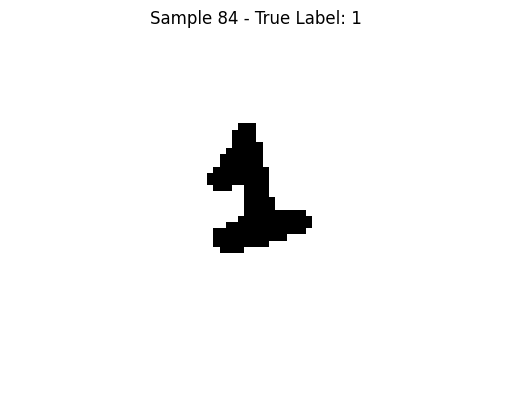

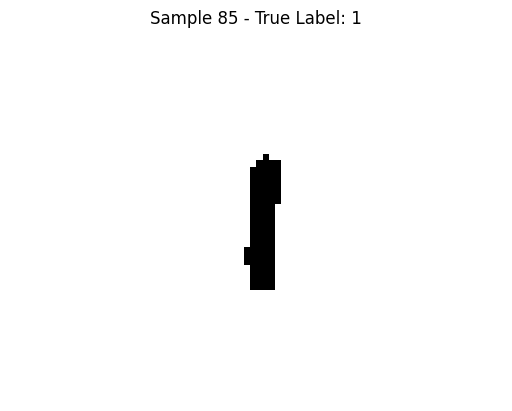

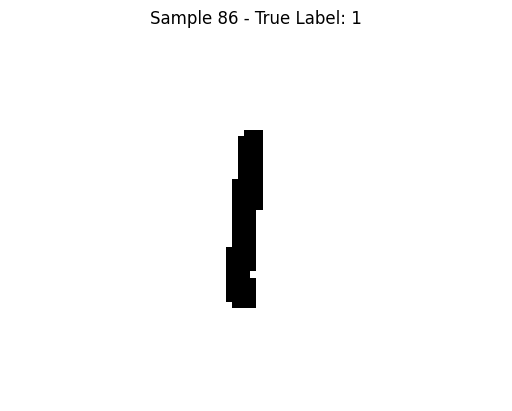

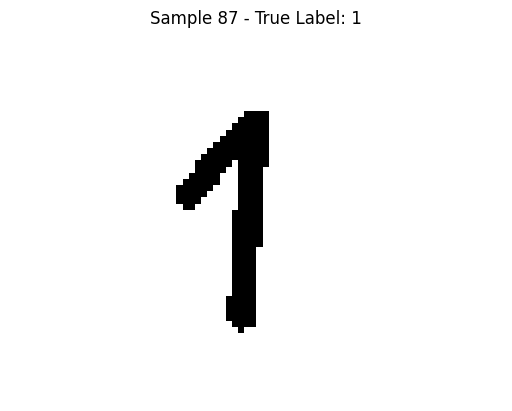

Training Set Class Distribution:
Class 0: 50 samples
Class 1: 50 samples
Class 2: 50 samples
Class 3: 50 samples
Class 4: 50 samples
Class 5: 50 samples
Class 6: 50 samples
Class 7: 50 samples
Class 8: 50 samples
Class 9: 50 samples
Class 10: 50 samples
Class 11: 50 samples
Class 12: 50 samples
Class 13: 50 samples
Class 14: 50 samples
Class 15: 50 samples
Class 16: 50 samples
Class 17: 50 samples
Class 18: 50 samples
Class 19: 50 samples
Class 20: 50 samples
Class 21: 50 samples
Class 22: 50 samples
Class 23: 50 samples
Class 24: 50 samples
Class 25: 50 samples
Class 26: 50 samples
Class 27: 50 samples
Class 28: 50 samples
Class 29: 50 samples
Class 30: 50 samples
Class 31: 50 samples
Class 32: 50 samples
Class 33: 50 samples
Class 34: 50 samples
Class 35: 50 samples
Class 36: 50 samples
Class 37: 50 samples
Class 38: 50 samples
Class 39: 50 samples
Class 40: 50 samples
Class 41: 50 samples
Class 42: 50 samples
Class 43: 50 samples
Class 44: 50 samples
Class 45: 50 samples
Class 46: 5

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Activation Functions
# ------------------------------

def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    """Derivative of the sigmoid function."""
    return a * (1 - a)

def softmax(z):
    """Softmax activation function."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability improvement
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# ------------------------------
# Neural Network Implementation
# ------------------------------

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, l2_lambda=0.001):
        """
        Initializes the neural network with given architecture.

        Parameters:
        - input_size (int): Number of input neurons.
        - hidden_size (int): Number of hidden neurons.
        - output_size (int): Number of output neurons.
        - l2_lambda (float): L2 regularization parameter.
        """
        # Xavier Initialization for weights
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
        # Biases initialized to 0 to prevent initial activation saturation
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))
        self.l2_lambda = l2_lambda
        print("Neural Network Initialized:")
        print(f"W1 shape: {self.W1.shape}")
        print(f"b1 shape: {self.b1.shape}")
        print(f"W2 shape: {self.W2.shape}")
        print(f"b2 shape: {self.b2.shape}\n")

    def forward_pass(self, X):
        """
        Performs the forward pass.

        Parameters:
        - X (np.ndarray): Input data, shape (batch_size, input_size)

        Returns:
        - A2 (np.ndarray): Output activations, shape (batch_size, output_size)
        - cache (tuple): Cached values for backpropagation
        """
        Z1 = np.dot(X, self.W1) + self.b1        # Shape: (batch_size, hidden_size)
        A1 = sigmoid(Z1)                         # Shape: (batch_size, hidden_size)
        Z2 = np.dot(A1, self.W2) + self.b2       # Shape: (batch_size, output_size)
        A2 = softmax(Z2)                         # Shape: (batch_size, output_size)
        cache = (Z1, A1, Z2, A2)
        
        # Debug: Print activation statistics for small batches
        if X.shape[0] <= 5:  # Adjust condition as needed
            print(f"Forward Pass Activations:")
            print(f"A1 stats - min: {A1.min()}, max: {A1.max()}, mean: {A1.mean()}")
            print(f"A2 stats - min: {A2.min()}, max: {A2.max()}, mean: {A2.mean()}\n")
        
        return A2, cache

    def compute_loss(self, A2, Y):
        """
        Computes the categorical cross-entropy loss with L2 regularization.

        Parameters:
        - A2 (np.ndarray): Output activations, shape (batch_size, output_size)
        - Y (np.ndarray): True labels, shape (batch_size, output_size)

        Returns:
        - total_loss (float): Computed loss
        """
        m = Y.shape[0]
        # To prevent log(0), clip the values
        A2_clipped = np.clip(A2, 1e-7, 1 - 1e-7)
        loss = -np.sum(Y * np.log(A2_clipped)) / m
        # L2 Regularization
        l2_loss = (self.l2_lambda / (2 * m)) * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        total_loss = loss + l2_loss
        return total_loss

    def backward_pass(self, X, Y, cache):
        """
        Performs the backward pass.

        Parameters:
        - X (np.ndarray): Input data, shape (batch_size, input_size)
        - Y (np.ndarray): True labels, shape (batch_size, output_size)
        - cache (tuple): Cached values from forward pass

        Returns:
        - gradients (tuple): Gradients with respect to W1, b1, W2, b2
        """
        Z1, A1, Z2, A2 = cache
        m = X.shape[0]

        # Output layer error
        dZ2 = A2 - Y                             # Shape: (batch_size, output_size)
        dW2 = np.dot(A1.T, dZ2) / m + (self.l2_lambda / m) * self.W2  # Shape: (hidden_size, output_size)
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # Shape: (1, output_size)

        # Hidden layer error
        dA1 = np.dot(dZ2, self.W2.T)             # Shape: (batch_size, hidden_size)
        dZ1 = dA1 * sigmoid_derivative(A1)       # Shape: (batch_size, hidden_size)
        dW1 = np.dot(X.T, dZ1) / m + (self.l2_lambda / m) * self.W1  # Shape: (input_size, hidden_size)
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # Shape: (1, hidden_size)

        # Print gradient norms for debugging
        grad_norm_W1 = np.linalg.norm(dW1)
        grad_norm_b1 = np.linalg.norm(db1)
        grad_norm_W2 = np.linalg.norm(dW2)
        grad_norm_b2 = np.linalg.norm(db2)
        print(f"Gradient Norms - W1: {grad_norm_W1:.4f}, b1: {grad_norm_b1:.4f}, W2: {grad_norm_W2:.4f}, b2: {grad_norm_b2:.4f}")

        gradients = (dW1, db1, dW2, db2)
        return gradients

    def update_parameters(self, gradients, learning_rate):
        """
        Updates the network's parameters using gradient descent.

        Parameters:
        - gradients (tuple): Gradients with respect to W1, b1, W2, b2
        - learning_rate (float): Learning rate for gradient descent
        """
        dW1, db1, dW2, db2 = gradients
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        print(f"Parameters updated with learning rate {learning_rate}")
        # Optional: Print a few weights to verify updates
        print(f"Sample W1[0][0]: {self.W1[0][0]:.4f}")
        print(f"Sample W2[0][0]: {self.W2[0][0]:.4f}\n")

    def predict(self, X):
        """
        Predicts the class labels for given input data.

        Parameters:
        - X (np.ndarray): Input data, shape (num_samples, input_size)

        Returns:
        - predictions (np.ndarray): Predicted class indices, shape (num_samples,)
        """
        A2, _ = self.forward_pass(X)             # Shape: (num_samples, output_size)
        predictions = np.argmax(A2, axis=1)      # Shape: (num_samples,)
        return predictions

    def evaluate_accuracy(self, X, Y):
        """
        Evaluates the accuracy of the model.

        Parameters:
        - X (np.ndarray): Input data, shape (num_samples, input_size)
        - Y (np.ndarray): True labels, shape (num_samples, output_size)

        Returns:
        - accuracy (float): Accuracy in percentage
        """
        predictions = self.predict(X)            # Shape: (num_samples,)
        true_labels = np.argmax(Y, axis=1)       # Shape: (num_samples,)
        accuracy = np.mean(predictions == true_labels) * 100
        return accuracy

# ------------------------------
# Training and Evaluation
# ------------------------------

def train_network(nn, X_train, Y_train, X_test, Y_test, epochs=100, batch_size=32, learning_rate=0.001, patience=10, lr_decay=0.5):
    """
    Trains the neural network with early stopping and learning rate decay.

    Parameters:
    - nn (NeuralNetwork): Instance of the NeuralNetwork class.
    - X_train (np.ndarray): Training data, shape (num_samples, input_size)
    - Y_train (np.ndarray): Training labels, shape (num_samples, num_classes)
    - X_test (np.ndarray): Testing data, shape (num_samples_test, input_size)
    - Y_test (np.ndarray): Testing labels, shape (num_samples_test, num_classes)
    - epochs (int): Number of training epochs
    - batch_size (int): Size of each mini-batch
    - learning_rate (float): Initial learning rate for gradient descent
    - patience (int): Number of epochs to wait for improvement before stopping
    - lr_decay (float): Factor by which to decay the learning rate

    Returns:
    - None
    """
    num_samples = X_train.shape[0]
    best_accuracy = 0
    patience_counter = 0
    current_lr = learning_rate
    print(f"Starting Training for {epochs} epochs with batch size {batch_size} and initial learning rate {current_lr}...\n")

    for epoch in range(1, epochs + 1):
        epoch_loss = 0

        # Shuffle the training data
        permutation = np.random.permutation(num_samples)
        X_shuffled = X_train[permutation]
        Y_shuffled = Y_train[permutation]

        # Iterate through the training data in batches
        for i in range(0, num_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]

            # Forward Pass
            A2, cache = nn.forward_pass(X_batch)

            # Compute Loss
            loss = nn.compute_loss(A2, Y_batch)
            epoch_loss += loss

            # Backward Pass
            gradients = nn.backward_pass(X_batch, Y_batch, cache)

            # Update Parameters
            nn.update_parameters(gradients, current_lr)

        # Average loss for the epoch
        avg_loss = epoch_loss / (num_samples / batch_size)
        print(f"Epoch {epoch}/{epochs} - Average Loss: {avg_loss:.4f}")

        # Evaluate on Test Set
        test_accuracy = nn.evaluate_accuracy(X_test, Y_test)
        print(f"Epoch {epoch}/{epochs} - Test Accuracy: {test_accuracy:.2f}%\n")

        # Early Stopping and Learning Rate Decay Check
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            patience_counter = 0
            print(f"New best accuracy: {best_accuracy:.2f}%\n")
        else:
            patience_counter += 1
            print(f"No improvement in accuracy for {patience_counter} epoch(s).")
            if patience_counter >= patience:
                # Decay learning rate
                current_lr *= lr_decay
                print(f"Reducing learning rate to {current_lr}\n")
                patience_counter = 0  # Reset patience
                if current_lr < 1e-6:
                    print("Learning rate has become too low. Stopping training.\n")
                    break

    print("Training Complete!\n")

# ------------------------------
# Prediction Visualization
# ------------------------------

def visualize_predictions(X, Y, predictions, num_samples=5):
    """
    Visualizes a few test samples along with their predicted and true labels.

    Parameters:
    - X (np.ndarray): Input data, shape (num_samples, input_size)
    - Y (np.ndarray): True labels, shape (num_samples, output_size)
    - predictions (np.ndarray): Predicted class indices, shape (num_samples,)
    - num_samples (int): Number of samples to visualize

    Returns:
    - None
    """
    for i in range(num_samples):
        img = X[i].reshape(60, 80)  # Adjust if your image dimensions differ
        true_label = np.argmax(Y[i])
        pred_label = predictions[i]
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}, Predicted: {pred_label}")
        plt.axis('off')
        plt.show()

# ------------------------------
# Main Function
# ------------------------------



# Normalize data if necessary
unique_values = np.unique(X_train)
print("Unique values in X_train:", unique_values)

if unique_values.max() > 1:
    print("Normalizing X_train and X_test to be between 0 and 1.")
    X_train = X_train / 255.0
    X_test = X_test / 255.0
else:
    print("X_train and X_test are already normalized between 0 and 1.\n")

# Verify label encoding
verify_label_encoding(Y_train, "Training Set")
verify_label_encoding(Y_test, "Test Set")

# Visualize data alignment
print("Visualizing a few samples to verify data alignment:")
check_data_alignment(X_train, Y_train, num_samples=5)

# Analyze class distribution
analyze_class_distribution(Y_train, "Training Set")
analyze_class_distribution(Y_test, "Test Set")

# Initialize the neural network
input_size = X_train.shape[1]    # 4800
hidden_size = 100
output_size = Y_train.shape[1]   # 62
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Overfit on a small subset
subset_size = 10
X_subset = X_train[:subset_size]
Y_subset = Y_train[:subset_size]
X_subset_test = X_subset.copy()
Y_subset_test = Y_subset.copy()

print(f"Overfitting on a small subset of {subset_size} samples.\n")
train_network(nn, X_subset, Y_subset, X_subset_test, Y_subset_test, epochs=200, batch_size=5, learning_rate=0.001, patience=20)

# Check subset accuracy
subset_accuracy = nn.evaluate_accuracy(X_subset_test, Y_subset_test)
print(f"Subset Training Accuracy: {subset_accuracy:.2f}%\n")

if subset_accuracy >= 99.0:
    print("Overfitting successful. Proceeding to train on the full dataset.\n")
    # Re-initialize the network for full training
    nn = NeuralNetwork(input_size, hidden_size, output_size)
    train_network(nn, X_train, Y_train, X_test, Y_test, epochs=100, batch_size=32, learning_rate=0.001, patience=10)

    # Final Evaluation on Test Set
    final_accuracy = nn.evaluate_accuracy(X_test, Y_test)
    print(f"Final Test Accuracy: {final_accuracy:.2f}%")

    # Example of Predictions
    predictions = nn.predict(X_test)
    true_labels = np.argmax(Y_test, axis=1)
    print("\nSample Predictions vs True Labels:")
else:
    print("Overfitting failed. Please check the model implementation or data preprocessing steps.\n")




In [133]:
predictions

array([32, 29, 13, 32, 32, 29, 32, 29, 29, 29, 32, 49, 32, 46, 29, 32, 44,
       32, 49, 29, 29, 44, 56, 29, 29,  9, 13, 29, 49, 49, 32, 37, 32, 29,
       46, 29, 29, 56, 51, 29, 11, 49, 56, 29, 29, 29, 29, 29, 29,  9,  8,
       29, 56, 49, 32, 32, 29, 32, 29, 32, 32, 32, 16, 32, 32, 13, 49, 32,
        9, 32,  8, 29, 56, 32, 32, 29, 29, 44, 32, 32, 32, 56, 32, 32, 32,
       51, 29, 56, 56, 32, 44, 29, 44, 53, 29, 32, 44, 51, 29, 49, 32, 49,
       32, 56, 56, 32, 56, 32, 32, 56, 32, 31, 34, 56, 32, 32, 29, 56, 56,
       56, 13, 13,  0, 32, 32,  8,  9,  8, 32, 32, 16, 29, 32, 32, 32, 32,
       29,  2, 29, 11,  9,  9, 32, 32, 32, 29, 51, 42, 44, 29, 32, 56, 53,
       32, 32, 51, 29, 53, 56, 56, 32, 13, 56, 56, 32, 32, 29,  8, 56, 32,
       32, 29, 56, 53, 56, 51, 49, 32, 29, 32, 56, 29, 32, 56, 32, 32, 29,
       32, 56, 32, 44, 29, 32, 49, 32, 32, 29,  2, 49, 56, 42, 46, 56, 32,
       44, 49, 37, 53, 29, 32, 32, 56, 56, 56, 32, 32, 29, 44, 56, 56, 53,
       49, 53, 49, 32, 51

In [202]:
total_zeros = np.sum(X_train == 0)
total_elements = X_train.size
percentage_zeros = (total_zeros / total_elements) 
percentage_zeros


0.05852372311827957

In [146]:
Y_train.shape

(3100, 62)

In [135]:
assert X_train.max() <= 1, "Input data is not normalized!"

In [200]:
import numpy as np

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Loss function
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Add small value to avoid log(0)
    return loss

def cross_entropy_derivative(y_true, y_pred):
    return y_pred - y_true

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        # Initialize weights and biases for each layer
        self.learning_rate = learning_rate
        
        # Hidden layer weights and biases
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2 / input_size)
        self.b1 = np.zeros((1, hidden_sizes[0]))
        
        # Second hidden layer (if needed)
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * np.sqrt(2 / hidden_sizes[0])
        self.b2 = np.zeros((1, hidden_sizes[1]))
        
        # Output layer
        self.W3 = np.random.randn(hidden_sizes[1], output_size) * np.sqrt(2 / hidden_sizes[1])
        self.b3 = np.zeros((1, output_size))
    
    def forward(self, X):
        # Layer 1
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        
        # Layer 2
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        
        # Output Layer
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = softmax(self.Z3)  # Final probabilities
        return self.A3
    
    def backward(self, X, y_true, y_pred):
        # Output layer gradient
        m = X.shape[0]
        dZ3 = cross_entropy_derivative(y_true, y_pred)
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        # Hidden layer 2 gradients
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Hidden layer 1 gradients
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = cross_entropy_loss(y, y_pred)
            self.backward(X, y, y_pred)
            
            print(f"Epoch {epoch}, Loss: {loss}")
    
    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

# Example Usage
if __name__ == "__main__":
    # Simulate data
    num_samples = 3100
    num_classes = 62
    input_size = 4800
    hidden_sizes = [256, 128]  # Two hidden layers with 256 and 128 nodes
    learning_rate = 0.01
    
    # Random data (3100 samples, 4800 features)
    # One-hot encode labels
  
    # Initialize and train the neural network
    nn = NeuralNetwork(input_size=input_size, hidden_sizes=hidden_sizes, output_size=num_classes, learning_rate=learning_rate)
    nn.train(X_train, Y_train, epochs=1000)
    



Epoch 0, Loss: 5.124968123136431
Epoch 1, Loss: 4.689670350657972
Epoch 2, Loss: 4.357117158583567
Epoch 3, Loss: 4.206229870500658
Epoch 4, Loss: 4.172556053285063
Epoch 5, Loss: 4.158872216816216
Epoch 6, Loss: 4.149525754070982
Epoch 7, Loss: 4.141757503957859
Epoch 8, Loss: 4.13521048687573
Epoch 9, Loss: 4.129630066287459
Epoch 10, Loss: 4.125519445446427
Epoch 11, Loss: 4.122236950795339
Epoch 12, Loss: 4.119390042022395
Epoch 13, Loss: 4.116797950253564
Epoch 14, Loss: 4.114427390915291
Epoch 15, Loss: 4.111923773655851
Epoch 16, Loss: 4.109257592802388
Epoch 17, Loss: 4.106421701866796
Epoch 18, Loss: 4.104051184955167
Epoch 19, Loss: 4.102026310658223
Epoch 20, Loss: 4.100091052804433
Epoch 21, Loss: 4.098243839374506
Epoch 22, Loss: 4.09642427776589
Epoch 23, Loss: 4.094978402776682
Epoch 24, Loss: 4.093728199576395
Epoch 25, Loss: 4.09243058824409
Epoch 26, Loss: 4.091593608700206
Epoch 27, Loss: 4.089902123684279
Epoch 28, Loss: 4.0889197848467855
Epoch 29, Loss: 4.08711052

KeyboardInterrupt: 

In [198]:
Y_train.shape

(3100, 62)

In [190]:
import numpy as np

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Predict function
def predict(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    """
    Perform forward propagation to predict labels for input data X.
    Args:
        X: Input data matrix (features), shape (input_size, num_samples).
        weights_input_hidden: Weights for the input-to-hidden layer.
        bias_hidden: Bias for the hidden layer.
        weights_hidden_output: Weights for the hidden-to-output layer.
        bias_output: Bias for the output layer.
    Returns:
        Predicted labels as indices of the max probability, shape (num_samples,).
    """
    # Forward pass
    hidden_input = np.dot(weights_input_hidden, X) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(weights_hidden_output, hidden_output) + bias_output
    output = sigmoid(output_input)
    
    # Predictions: index of the maximum probability for each sample
    predictions = np.argmax(output, axis=0)
    return predictions

# Accuracy function
def calculate_accuracy(predictions, true_labels):
    """
    Calculate the accuracy of predictions compared to true labels.
    Args:
        predictions: Predicted labels, shape (num_samples,).
        true_labels: True labels as one-hot encoded, shape (output_size, num_samples).
    Returns:
        Accuracy as a float.
    """
    true_indices = np.argmax(true_labels, axis=0)
    accuracy = np.mean(predictions == true_indices)
    return accuracy

weights_input_hidden = nn.weights_input_hidden
bias_hidden = nn.bias_hidden
weights_hidden_output = nn.weights_hidden_output
bias_output = nn.bias_output
predictions = predict(X_train.T, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)

accuracy = calculate_accuracy(predictions, Y_train.T)
print(f"Test Accuracy: {accuracy*100 }%")


Test Accuracy: 1.3225806451612903%


In [171]:
predictions

array([60, 60, 60, ..., 60, 60, 60], dtype=int64)

In [183]:
output = nn.forward(X_train.T[:, :5])  # Forward pass for the first 5 samples
print(f"Output probabilities (first 5 samples):\n{output}")
print(f"Sum of probabilities (should be ~1 for each sample):\n{np.sum(output, axis=0)}")


Output probabilities (first 5 samples):
[[0.01219561 0.01854843 0.0183065  0.01633126 0.01719618]
 [0.02136599 0.01169537 0.01824763 0.02123737 0.01678603]
 [0.0246382  0.02362364 0.02084932 0.02061731 0.0207615 ]
 [0.02588505 0.02512169 0.0203773  0.02254033 0.02250568]
 [0.01460963 0.01554316 0.01396891 0.0174721  0.01681176]
 [0.01666325 0.02036246 0.01598604 0.01497715 0.01665688]
 [0.01380229 0.01883375 0.01322338 0.01391389 0.01544225]
 [0.0245769  0.01953653 0.02339444 0.0212493  0.02298001]
 [0.01948815 0.0242424  0.0128537  0.01598691 0.01862664]
 [0.02056662 0.02231557 0.0186996  0.01991676 0.02180302]
 [0.01538048 0.01798629 0.01195814 0.01880191 0.01786238]
 [0.01305702 0.01875679 0.01004602 0.01086469 0.01390636]
 [0.00675847 0.01329177 0.01160941 0.00740132 0.00831087]
 [0.01075042 0.01766467 0.01645907 0.00972855 0.01392618]
 [0.01450381 0.01855119 0.01554632 0.01346988 0.01506705]
 [0.01581334 0.01524982 0.01836492 0.01662498 0.01732386]
 [0.0108805  0.02328605 0.015561

In [ ]:
X_train

(3100, 4800)